# Sprint 9 | Machine Learning in Business

<div style="border: 2px solid black; padding: 10px; margin: 10px">

In this project, we'll investigate the volume of oil, and later choose the region with the highest total profit, for <b>OilyGiant</b>. This company is asking to find the best new location to construct a new well that will yield the highest profitability.<br>

Our goal is to find the region with the <b>highest profitability</b> and <b>lowest risk</b> to recommend to <b>OilyGiant</b> as their next site for a new oil well. (We'll only consider the regions with the risk of losses as 2.5% or lower in our final recommendations.)

</div>

## Data Preparation

In [6]:
# Importing required libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Constant Variable Assignment

BUDGET = 100_000_000
BARREL_REV = 4500
POINTS = 200

### Region 1

In [10]:
# Importing data

r1 = pd.read_csv('geo_data_region1.csv')

#### Columns

In [13]:
# Removing white space from beginning and end of column labels
r1.columns = r1.columns.str.strip()

# Visual validation of column labels
r1.columns

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

#### Null Values

In [16]:
# Checking datatypes and null values

r1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<div style="border: 2px solid black; padding: 10px; margin: 10px">

No null values present. All data is of the appropriate datatype.

</div>

#### Duplicates

In [20]:
# Checking for duplicates after dropping 'id' column
# 'id' column not required for model testing

r1m = r1.drop('id', axis=1)

r1m.duplicated().sum()

0

<div style="border: 2px solid black; padding: 10px; margin: 10px">

No duplicates present.

</div>

#### Previewing Data

In [24]:
# Vieweing the first 10 rows

r1m.head(10)

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
5,0.969570,0.489775,-0.735383,64.741541
6,0.645075,0.530656,1.780266,49.055285
7,-0.400648,0.808337,-5.624670,72.943292
8,0.643105,-0.551583,2.372141,113.356160
9,2.173381,0.563698,9.441852,127.910945


<div style="border: 2px solid black; padding: 10px; margin: 10px">

We see five columns present in the data. Negative and positive values present.

</div>

### Region 2

In [29]:
# Importing data

r2 = pd.read_csv('geo_data_region2.csv')

#### Columns

In [32]:
# Removing white space from beginning and end of column labels
r2.columns = r2.columns.str.strip()

# Visual validation of column labels
r2.columns

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

#### Null Values

In [35]:
# Checking datatypes and null values

r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<div style="border: 2px solid black; padding: 10px; margin: 10px">

No null values present. All data is of the appropriate datatype.

</div>

#### Duplicates

In [39]:
# Checking for duplicates after dropping 'id' column
# 'id' column not required for model testing

r2m = r2.drop('id', axis=1)

r2m.duplicated().sum()

0

<div style="border: 2px solid black; padding: 10px; margin: 10px">

No duplicates present.

</div>

#### Previewing Data

In [43]:
# Vieweing the first 10 rows

r2m.head(10)

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
5,-3.327590,-2.205276,3.003647,84.038886
6,-11.142655,-10.133399,4.002382,110.992147
7,4.234715,-0.001354,2.004588,53.906522
8,13.355129,-0.332068,4.998647,134.766305
9,1.069227,-11.025667,4.997844,137.945408


<div style="border: 2px solid black; padding: 10px; margin: 10px">

We see five columns present in the data. Negative and positive values present.

</div>

### Region 3

In [48]:
# Importing data

r3 = pd.read_csv('geo_data_region3.csv')

#### Columns

In [51]:
# Removing white space from beginning and end of column labels
r3.columns = r3.columns.str.strip()

# Visual validation of column labels
r3.columns

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

#### Null Values

In [54]:
# Checking datatypes and null values

r3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<div style="border: 2px solid black; padding: 10px; margin: 10px">

No null values present. All data is of the appropriate datatype.

</div>

#### Duplicates

In [58]:
# Checking for duplicates after dropping 'id' column
# 'id' column not required for model testing

r3m = r3.drop('id', axis=1)

r3m.duplicated().sum()

0

<div style="border: 2px solid black; padding: 10px; margin: 10px">

No duplicates present.

</div>

#### Previewing Data

In [62]:
# Vieweing the first 10 rows

r3m.head(10)

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
5,-0.758092,0.710691,2.585887,90.222465
6,-0.574891,0.317727,1.773745,45.641478
7,-1.906649,-2.458350,-0.177097,72.480640
8,1.776292,-0.279356,3.004156,106.616832
9,-1.214452,-0.439314,5.922514,52.954532


<div style="border: 2px solid black; padding: 10px; margin: 10px">

We see five columns present in the data. Negative and positive values present.

</div>

## Training and Testing Model

### Region 1 | Training & Analysis

In [68]:
# Splitting data, training and testing model

# Isolating the Target and Features from the data
target_r1 = r1m['product']
features_r1 = r1m.drop('product', axis=1)

# Creating Training and Validation sets (75:25)
features_r1_train, features_r1_valid, target_r1_train, target_r1_valid = train_test_split(
    features_r1, target_r1, test_size=0.25, random_state=12345
)

# Initializing model constructor
model_r1 = LinearRegression()

# Training the model
model_r1.fit(features_r1_train, target_r1_train)

# Running predictions on the validation set
predictions_r1_valid = model_r1.predict(features_r1_valid)
correct_answers_r1 = target_r1_valid

# Calculating RMSE & Avg Volume of Predicted Reserves
result_r1_rmse = mean_squared_error(correct_answers_r1, predictions_r1_valid)**0.5
avg_vol_predictions_r1 = predictions_r1_valid.mean()

# Printing results
print("RMSE - Region 1 on Validation Set:", result_r1_rmse)
print("Avg Volume of Predicted Reserves:", avg_vol_predictions_r1)

RMSE - Region 1 on Validation Set: 37.5794217150813
Avg Volume of Predicted Reserves: 92.59256778438038


<div style="border: 2px solid black; padding: 10px; margin: 10px">

<u><b>Results Analysis</b></u>

First look at the RMSE result does not indicate a high accuracy rating for this model to actual target data. It's indicating about a 37.5 thousand barrel difference from the predictions the model made to actual data.

Average Volume of Predicted Reserves is noted and will be compared as we continue our analysis through the other regions.

</div>

### Region 2 | Training & Analysis

In [73]:
# Splitting data, training and testing model

# Isolating the Target and Features from the data
target_r2 = r2m['product']
features_r2 = r2m.drop('product', axis=1)

# Creating Training and Validation sets (75:25)
features_r2_train, features_r2_valid, target_r2_train, target_r2_valid = train_test_split(
    features_r2, target_r2, test_size=0.25, random_state=12345
)

# Initializing model constructor
model_r2 = LinearRegression()

# Training the model
model_r2.fit(features_r2_train, target_r2_train)

# Running predictions on the validation set
predictions_r2_valid = model_r2.predict(features_r2_valid)
correct_answers_r2 = target_r2_valid

# Calculating RMSE & Avg Volume of Predicted Reserves
result_r2_rmse = mean_squared_error(correct_answers_r2, predictions_r2_valid)**0.5
avg_vol_predictions_r2 = predictions_r2_valid.mean()

# Printing results
print("RMSE - Region 2 on Validation Set:", result_r2_rmse)
print("Avg Volume of Predicted Reserves:", avg_vol_predictions_r2)

RMSE - Region 2 on Validation Set: 0.8930992867756165
Avg Volume of Predicted Reserves: 68.728546895446


<div style="border: 2px solid black; padding: 10px; margin: 10px">

<u><b>Results Analysis</b></u>

Our RMSE for Region 2 is showing a much better RMSE score indicating a higher accuracy rating in the model's predictions.

We do, though, see a significant decrease in the average volume of the predicted reserves for this region compared to Region 1. 

</div>

### Region 3 | Training & Analysis

In [78]:
# Splitting data, training and testing model

# Isolating the Target and Features from the data
target_r3 = r3m['product']
features_r3 = r3m.drop('product', axis=1)

# Creating Training and Validation sets (75:25)
features_r3_train, features_r3_valid, target_r3_train, target_r3_valid = train_test_split(
    features_r3, target_r3, test_size=0.25, random_state=12345
)

# Initializing model constructor
model_r3 = LinearRegression()

# Training the model
model_r3.fit(features_r3_train, target_r3_train)

# Running predictions on the validation set
predictions_r3_valid = model_r3.predict(features_r3_valid)
correct_answers_r3 = target_r3_valid

# Calculating RMSE & Avg Volume of Predicted Reserves
result_r3_rmse = mean_squared_error(correct_answers_r3, predictions_r3_valid)**0.5
avg_vol_predictions_r3 = predictions_r3_valid.mean()

# Printing results
print("RMSE - Region 3 on Validation Set:", result_r3_rmse)
print("Avg Volume of Predicted Reserves:", avg_vol_predictions_r3)

RMSE - Region 3 on Validation Set: 40.02970873393434
Avg Volume of Predicted Reserves: 94.96504596800492


<div style="border: 2px solid black; padding: 10px; margin: 10px">

<u><b>Results Analysis</b></u>

Our RMSE for Region 3 is the highest of the three regions we are analyzing but it also has the highest average volume of predicted reserves. We'll have to see which of the three is most profitable after calculating our risk and profit metrics.

</div>

## Analyzing the Distributions

### Region 1

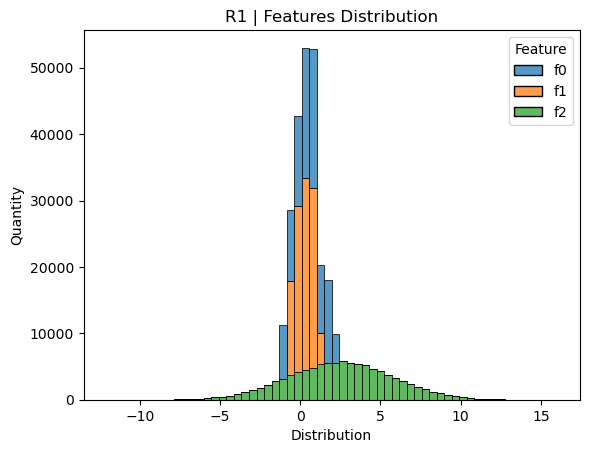

,f0,f1,f2
count,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647
std,0.871832,0.504433,3.248248
min,-1.408605,-0.848218,-12.088328
25%,-0.072580,-0.200881,0.287748
50%,0.502360,0.250252,2.515969
75%,1.073581,0.700646,4.715088
max,2.362331,1.343769,16.003790


In [84]:
# Features Distribution

# Reshaping data for better visual
features_r1_long = features_r1.melt(var_name='Feature', value_name='Value')

# Creating histogram
sns.histplot(data=features_r1_long, 
             x='Value', 
             hue='Feature', 
             bins=60,
             palette='tab10', 
             edgecolor='black', 
             multiple='stack'
            )

plt.title('R1 | Features Distribution')
plt.xlabel('Distribution')
plt.ylabel('Quantity')

plt.show()

features_r1.describe()

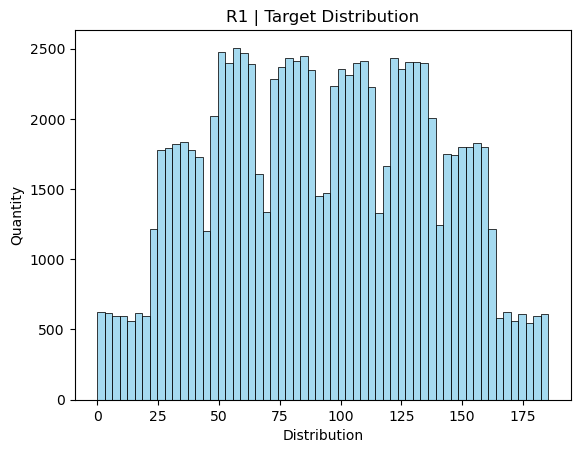

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

In [87]:
# Target Distribution

sns.histplot(data=target_r1, bins=60, color='skyblue')

plt.title('R1 | Target Distribution')
plt.xlabel('Distribution')
plt.ylabel('Quantity')

plt.show()

target_r1.describe()

<div style="border: 2px solid black; padding: 10px; margin: 10px">

<b><u>Conclusions</u></b>

As we look at the distributions of the features, we see that the 'f2' feature is evenly distributed but it's mean is greater than 0. For the other two features, although less even of a distribution, lies more centered with the mean being closer to zero.<br>

Our target variable distribution seems to be evently distributed as well but it has sporadic readings as it progresses through the curve.

</div>

### Region 2

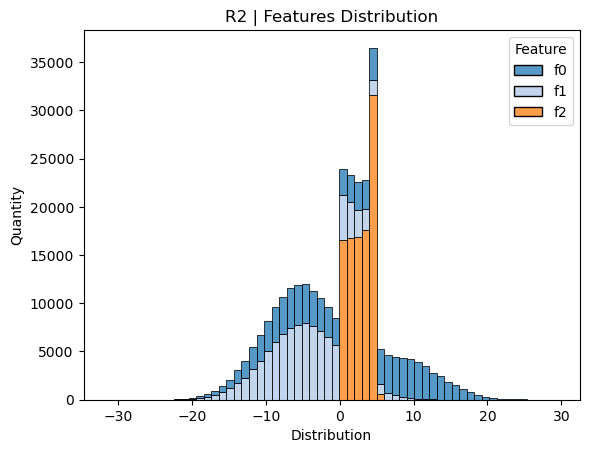

,f0,f1,f2
count,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541
std,8.965932,5.119872,1.703572
min,-31.609576,-26.358598,-0.018144
25%,-6.298551,-8.267985,1.000021
50%,1.153055,-4.813172,2.011479
75%,8.621015,-1.332816,3.999904
max,29.421755,18.734063,5.019721


In [92]:
# Features Distribution

# Reshaping data for better visual
features_r2_long = features_r2.melt(var_name='Feature', value_name='Value')

# Creating histogram
sns.histplot(data=features_r2_long, 
             x='Value', 
             hue='Feature', 
             bins=60, 
             palette='tab20', 
             edgecolor='black', 
             multiple='stack',
            )

plt.title('R2 | Features Distribution')
plt.xlabel('Distribution')
plt.ylabel('Quantity')

plt.show()

features_r2.describe()

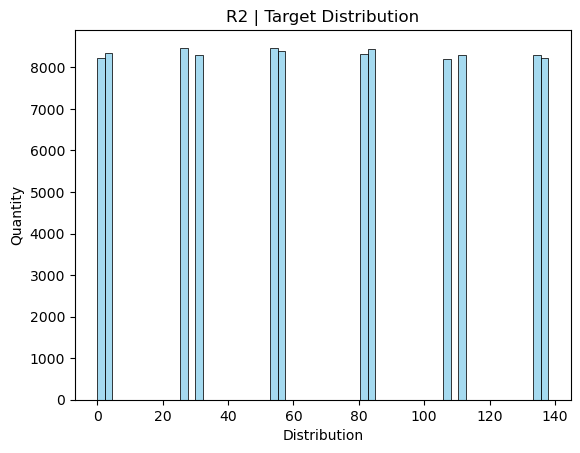

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

In [95]:
# Target Distribution

sns.histplot(data=target_r2, bins=60, color='skyblue')

plt.title('R2 | Target Distribution')
plt.xlabel('Distribution')
plt.ylabel('Quantity')

plt.show()

target_r2.describe()

<div style="border: 2px solid black; padding: 10px; margin: 10px">

<b><u>Conclusions</u></b>

The features for this distribution seem to follow a similar pattern and all have a spike in readings around the same area. Very different from Region 1 numbers.<br>

The target distribution for Region 2 is also disctinct in that it has the same value (or quantity) dispursed throughout the distribution.

</div>

### Region 3

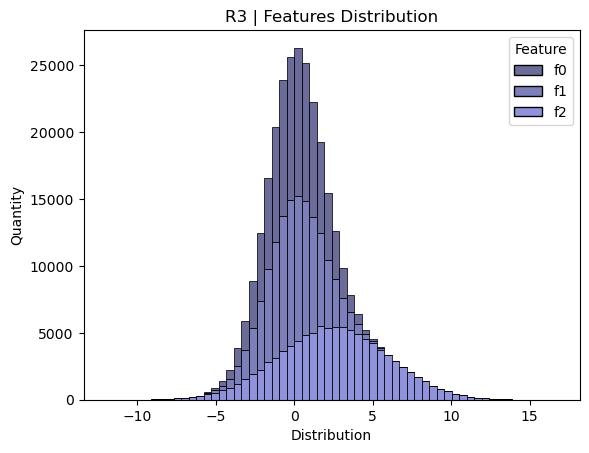

,f0,f1,f2
count,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128
std,1.732045,1.730417,3.473445
min,-8.760004,-7.084020,-11.970335
25%,-1.162288,-1.174820,0.130359
50%,0.009424,-0.009482,2.484236
75%,1.158535,1.163678,4.858794
max,7.238262,7.844801,16.739402


In [100]:
# Features Distribution

# Reshaping data for better visual
features_r3_long = features_r3.melt(var_name='Feature', value_name='Value')

# Creating histogram
sns.histplot(data=features_r3_long, 
             x='Value', 
             hue='Feature', 
             bins=60, 
             palette='tab20b', 
             edgecolor='black', 
             multiple='stack',
            )

plt.title('R3 | Features Distribution')
plt.xlabel('Distribution')
plt.ylabel('Quantity')

plt.show()

features_r3.describe()

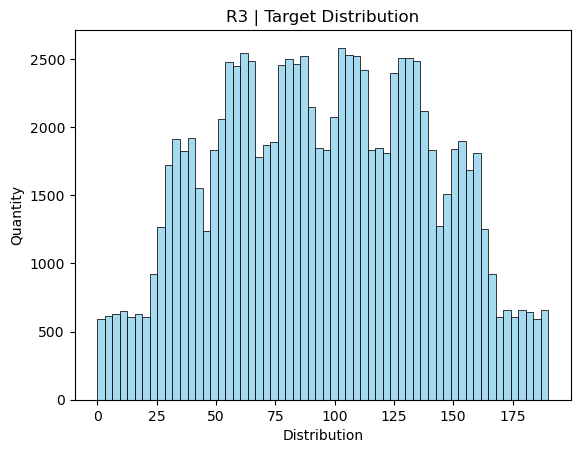

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

In [103]:
# Target Distribution

sns.histplot(data=target_r3, bins=60, color='skyblue')

plt.title('R3 | Target Distribution')
plt.xlabel('Distribution')
plt.ylabel('Quantity')

plt.show()

target_r3.describe()

<div style="border: 2px solid black; padding: 10px; margin: 10px">

<b><u>Conclusions</u></b>

The features for Region 3 all have a much more reliable and consistent distribution. They all follow a similar curve except for 'f2' feature which has its mean greater than the other two.<br>

The target distribution for Region 3 is similar to Region 1 in its sporadic nature but also seems to follow a normal distribution throughout its curve.

</div>

## Preparing Data for Profit Calculation

In [108]:
# Break-Even Volume

break_even_volume = (BUDGET / BARREL_REV) / POINTS

print(f"{break_even_volume:,.2f}")

111.11


In [110]:
# Variance in Each Region

var_r1 = avg_vol_predictions_r1 - break_even_volume
var_r2 = avg_vol_predictions_r2 - break_even_volume
var_r3 = avg_vol_predictions_r3 - break_even_volume

print(f"Variance for Region 1: {var_r1:,.2f}")
print(f"Variance for Region 1: {var_r2:,.2f}")
print(f"Variance for Region 1: {var_r3:,.2f}")

Variance for Region 1: -18.52
Variance for Region 1: -42.38
Variance for Region 1: -16.15


<div style="border: 2px solid black; padding: 10px; margin: 10px">

From our findings comparing the average well volumes of each region to the <b>Break-Even Volume</b> we see that none of the regions can provide a break-even point by the average. We will have to train our model to be able to detect which wells hold the most volume to help increase our yield and therefore revenue for each region.

</div>

## Profit for Each Region

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Here, we're basing the calculations on the following parameters:
1. Studied 500 points, but choosing <b>the best 200</b>
2. The budget for those 200 wells is <b>\$100 Million</b>
3. Revenue per Barrel is \$4.5 (<b>or $4,500 per thousand barrels</b>)

</div>

In [117]:
# Creating function to calculate profit for each region

def calculate_profit(target, predictions):

    # Create pairs of (prediction, target)
    pairs = list(zip(predictions, target))
    
    # Sort pairs by prediction in descending order
    sorted_pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
    
    # Select top 200 wells
    top_wells = sorted_pairs[:POINTS]

    # Getting the sum of the "actual target values"
    # Extracting second value in each tuple in the list
    actual_sum = sum(t[1] for t in top_wells)

    # Calculating Revenue
    revenue = actual_sum * BARREL_REV

    # Calculating Profit
    profit = revenue - BUDGET 

    # Returning the profit
    return profit

### Calculating Profit for Each Region

In [121]:
## Calculating using the "profit" function

# Region 1
profit_r1 = calculate_profit(correct_answers_r1, predictions_r1_valid)

# Region 2
profit_r2 = calculate_profit(correct_answers_r2, predictions_r2_valid)

# Region 3
profit_r3 = calculate_profit(correct_answers_r3, predictions_r3_valid)


# Printing results
print(f"Profit for Region 1: ${profit_r1:,.2f}")
print(f"Profit for Region 2: ${profit_r2:,.2f}")
print(f"Profit for Region 3: ${profit_r3:,.2f}")

Profit for Region 1: $33,208,260.43
Profit for Region 2: $24,150,866.97
Profit for Region 3: $27,103,499.64


<div style="border: 2px solid black; padding: 10px; margin: 10px">

From our calculations here for the potiential profit of each region, it appears that <b>Region 2</b> is the region that will yield the most profit of all three regions. This is the region I would recommend to invest resources and time to yield the greatest ROI.   

</div>

## Risk for Each Region

In [127]:
# Creating risk function

def calculate_risk(bootstrap_profits):
    # Converting bootstrap_profits to an array
    bootstrap_array = np.array(bootstrap_profits)

    # Creating a boolean array to differentiate gains & losses
    losses = bootstrap_array < 0

    # Adding up the losses
    losses_sum = sum(losses)

    # Calculating the risk percentage
    risk_prob = losses_sum / len(bootstrap_array)

    # Returning risk value as a percentage
    return risk_prob * 100
    

# Store results for all 3 regions
all_region_results = []


# Analyze each region one by one
for region in range(3):
    
    # Get the right data for this region
    if region == 1:
        predictions = pd.Series(predictions_r1_valid).reset_index(drop=True) 
        actual = pd.Series(target_r1_valid).reset_index(drop=True)
    elif region == 2:
        predictions = pd.Series(predictions_r2_valid).reset_index(drop=True)
        actual = pd.Series(target_r2_valid).reset_index(drop=True)
    else:  
        region == 3
        predictions = pd.Series(predictions_r3_valid).reset_index(drop=True)
        actual = pd.Series(target_r3_valid).reset_index(drop=True)
    
    # Initializing empty list to store profit values
    bootstrap_profits = []

    # Specifying random state
    state = np.random.RandomState(315)
    
    for i in range(1000):

        # Generating 500 random samples from "predictions"
        random_indices = state.choice(len(predictions), size=500, replace=True)
        
        # Connecting the sampled indices with their predictions
        sampled_predictions = predictions[random_indices]

        # Doing the same with the actual Series
        sampled_actual = actual.iloc[random_indices]

        # Calculating profit with function
        profit = calculate_profit(sampled_actual, sampled_predictions)

        # Appending profit values to "bootstrap_profits"
        bootstrap_profits.append(profit)

    # Calculating 95% confidence interval
    lower_bound = np.percentile(bootstrap_profits, 2.5)
    upper_bound = np.percentile(bootstrap_profits, 97.5)

    # Calculate risk with existing function
    risk = calculate_risk(bootstrap_profits)

    # Store results
    all_region_results.append({
        'region': region + 1,
        'risk': risk,
        'avg_profit': np.mean(bootstrap_profits),
        'lower_95_CI': lower_bound,
        'upper_95_CI': upper_bound
    })


# Compare regions and pick the best one
for result in all_region_results:
    print(f"Region {result['region']}: Risk = {result['risk']:.1f}%, Avg Profit = ${result['avg_profit']:,.0f}, 95% CI: (${result['lower_95_CI']:,.0f}, ${result['upper_95_CI']:,.0f})\n")
    

Region 1: Risk = 6.8%, Avg Profit = $3,900,761, 95% CI: ($-1,256,051, $9,332,663)

Region 2: Risk = 7.8%, Avg Profit = $3,863,352, 95% CI: ($-1,404,469, $8,968,260)

Region 3: Risk = 1.1%, Avg Profit = $4,646,863, 95% CI: ($713,954, $8,622,850)



## Recommendations

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Based on the findings in the analysis of this project, it appears that <b>Region 3</b> is our clear winner! It is estimated an <b>Avg Profit of over <u>$4.6 Million</u>.</b> The amount of risk for this region was calculated to be only <b>1.1%</b>, while it was calculated to be much more in the other regions (Region 1: 6.8%, Region 2: 7.8%).

This region is the most profitable out of all the regions we analyzed which makes sense after exploring the visualizations for the distributions of each region. Region 3 had the most normally distributed feature data which would inform the model more accurately giving us favorable results.

</div>